# Marketing-data EDA

(주)플루비오파일의 도지 인형의 마케팅 데이터에 대한 EDA입니다.

마케팅 결과에 대해 성별에 따른 분석, 각 성별에서 광고 세트에 따른 분석, 각 성별에서 연령대에 따른 분석을 진행하였습니다.

분석을 위해 살펴본 지표는 결과 수, 노출 수, CTR, CPM, CPC, 도달 수 대비 노출 수, 1 - (결과 수 대비 랜딩페이지 조회 수)입니다.

결과 수 및 노출 수를 통해 광고 집행 결과를 파악하였고, CTR, CPM, CPC, 도달 수 대비 노출 수, 1 - (결과 수 대비 랜딩페이지 조회 수)로 광고 집행 결과를 평가하였습니다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm

In [ ]:
path = 'C:\\WINDOWS\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

In [ ]:
colors = sns.light_palette("#5851FF", reverse=True)

In [ ]:
mdata1 = pd.read_csv('marketing data split.csv')

In [ ]:
mdata1.drop(mdata1[mdata1['성']=='unknown'].index, inplace = True)

# 성별에 따른 분석

## 성별에 따른 광고 집행 결과

### 전체 노출 수

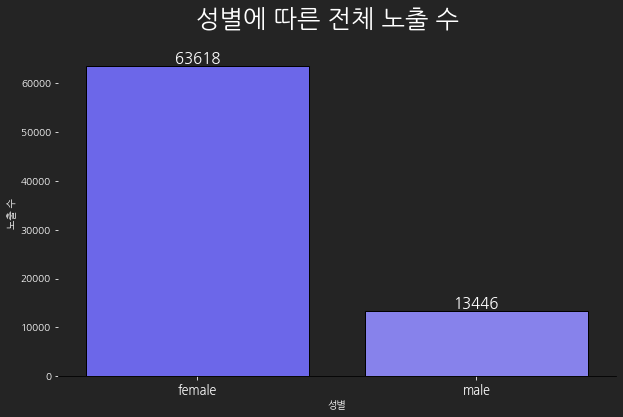

In [ ]:
# 여성에게 광고 노출이 훨씬 많이 됨
plt.figure(figsize=(10,6))
x = sns.barplot(data = mdata1, x='성', y='노출', palette = colors,
            estimator = sum, ci = None, edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+500), ha = 'center', size =15, color = 'white')
plt.xlabel('성별', color='white')
plt.ylabel('노출 수', color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('성별에 따른 전체 노출 수',color='white' ,size = 25)
plt.show()

### 전체 결과 수

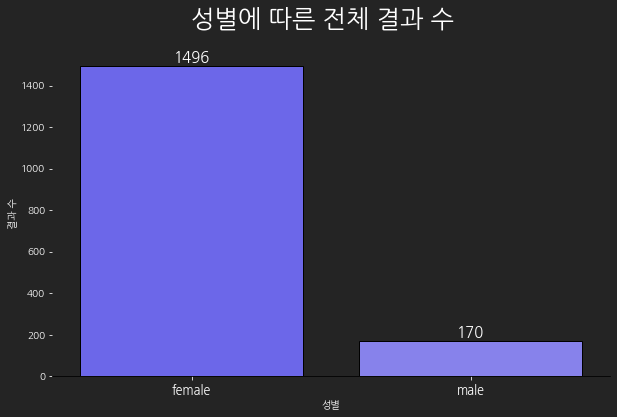

In [ ]:
# 결과 = 링크 클릭. 여성에서의 링크 클릭 수가 훨씬 많았지만 노출 수도 훨씬 많았음.
plt.figure(figsize=(10,6))
x = sns.barplot(data = mdata1, x='성', y='결과', palette = colors,
            estimator = sum, ci = None, edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+20), ha = 'center', size =15, color = 'white')
plt.xlabel('성별',color='white')
plt.ylabel('결과 수',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('성별에 따른 전체 결과 수',color='white' ,size = 25)
plt.show()

## 성별에 따른 광고 집행 결과 평가

In [ ]:
mdata1['CTR노출'] = mdata1['노출'] * mdata1['CTR(전체)']

In [ ]:
mdata1['CPM노출'] = mdata1['노출'] * mdata1['CPM(1,000회 노출당 비용)']

In [ ]:
mdata1['CPC노출'] = mdata1['노출'] * mdata1['CPC(링크 클릭당 비용)']

In [ ]:
sex_data = mdata1.groupby('성')['노출'].sum()

In [ ]:
sex_df = mdata1.groupby('성')[['CTR노출', 'CPM노출', 'CPC노출']].sum()

In [ ]:
sex_df['CTR'] = [sex_df.loc['female', 'CTR노출'] / sex_data['female'],
                 sex_df.loc['male', 'CTR노출'] / sex_data['male']]
sex_df['CPM'] = [sex_df.loc['female', 'CPM노출'] / sex_data['female'],
                 sex_df.loc['male', 'CPM노출'] / sex_data['male']]
sex_df['CPC'] = [sex_df.loc['female', 'CPC노출'] / sex_data['female'],
                 sex_df.loc['male', 'CPC노출'] / sex_data['male']]
sex_df['성'] = ['female', 'male']

In [ ]:
sex_data11 = mdata1.groupby('성')[['결과', '랜딩 페이지 조회', '도달수', '노출']].sum()

In [ ]:
sex_data11['1 - 랜딩/결과'] = 1 - sex_data11['랜딩 페이지 조회'] / sex_data11['결과']
sex_data11['노출/도달'] = sex_data11['노출'] / sex_data11['도달수']
sex_data11['성'] = ['female', 'male']

### CPC

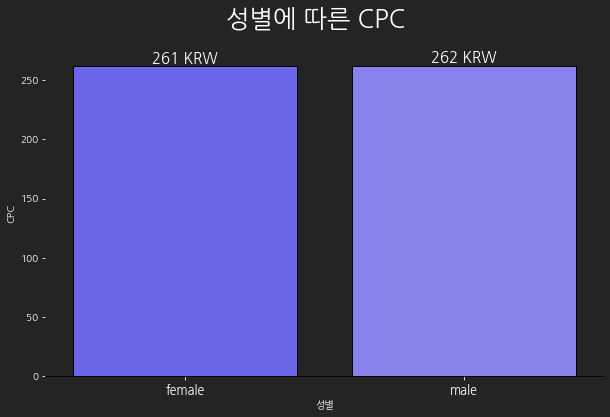

In [ ]:
# CPC(결과당 비용)를 가중평균으로 계산하여 그래프로 나타낸 것
# -> 링크 클릭에 투입되는 비용!! 낮을수록 좋지만 남녀 차이 거의 없음
plt.figure(figsize=(10,6))
x = sns.barplot(data = sex_df, x='성', y='CPC', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + ' KRW'}",(left+width/2, height+3), ha = 'center', size =15, color = 'white')
plt.xlabel('성별',color='white')
plt.ylabel('CPC',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('성별에 따른 CPC', size = 25,color='white')
plt.show()

### CPM

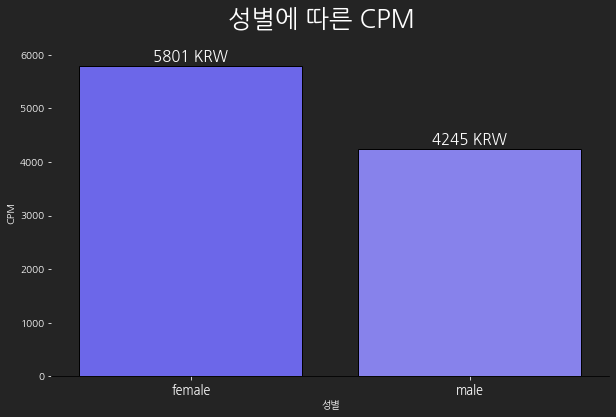

In [ ]:
# CPM(1,000회 노출당 비용)을 가중평균으로 계산하여 그래프로 나타낸 것
# -> 광고 노출에 투입되는 비용!! 적을수록 효율이 좋은 것 -> 남성 효율 좋다!!
plt.figure(figsize=(10,6))
x = sns.barplot(data = sex_df, x='성', y='CPM', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + ' KRW'}",(left+width/2, height+100), ha = 'center', size =15, color = 'white')
plt.xlabel('성별',color='white')
plt.ylabel('CPM',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('성별에 따른 CPM',color='white' ,size = 25)
plt.show()

### CTR

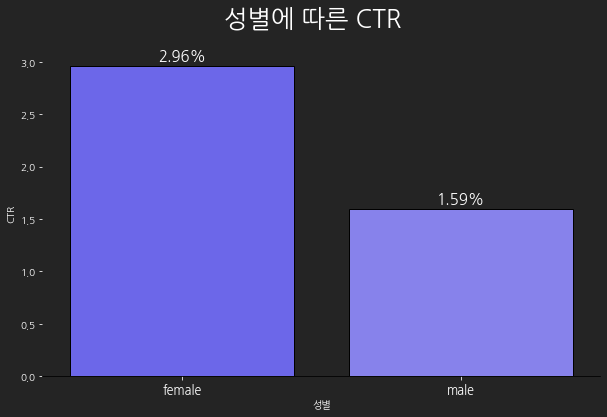

In [ ]:
# CTR(노출 대비 결과)을 가중평균으로 계산하여 그래프로 나타낸 것
# -> 현재의 광고 전략이 제대로 이루어지는가?!
# -> 여성에서 더 높음 ==> 광고가 여성을 타겟으로 하며, 남성의 링크 클릭을 이끌어내지 못하고 있음.
plt.figure(figsize=(10,6))
x = sns.barplot(data = sex_df, x='성', y='CTR', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(round(height, 2)) + '%'}",(left+width/2, height+0.05), ha = 'center', size =15, color = 'white')
plt.xlabel('성별',color='white')
plt.ylabel('CTR',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('성별에 따른 CTR',color='white' ,size = 25)
plt.show()

### 노출 수 / 도달 수

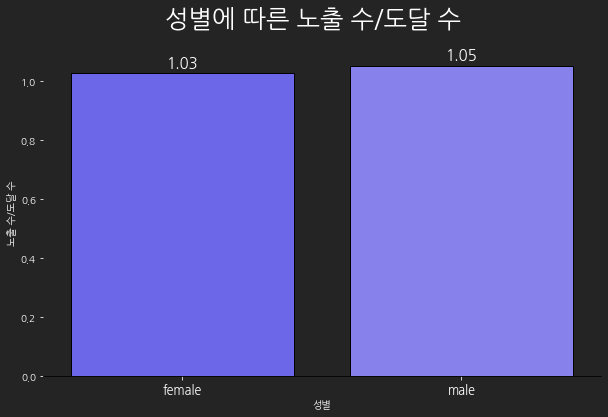

In [ ]:
# 4가 넘어가면 광고 피로도가 존재하는 것. 하지만 두 성별에서 모두 피로도가 4를 넘지 않음!
plt.figure(figsize=(10,6))
x = sns.barplot(data = sex_data11, x='성', y='노출/도달', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{round(height, 2)}",(left+width/2, height+0.02), ha = 'center', size =15, color = 'white')
plt.xlabel('성별',color='white')
plt.ylabel('노출 수/도달 수',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('성별에 따른 노출 수/도달 수', size = 25,color='white')
plt.show()

### 1 - (랜딩페이지 조회 수 / 결과 수)

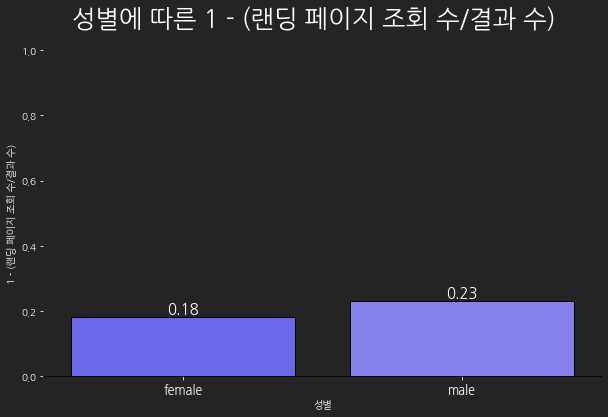

In [ ]:
# 광고에서 랜딩페이지로 연결되지 못한 부분.
# 높다면 링크를 실수로 클릭한 사람이 많다는 것을 의미하는데, 남성이 여성보다 높음.
# 즉, 링크 클릭 후 페이지 접속으로 이어지지 않는 비율이 남성이 더 높음
plt.figure(figsize=(10,6))
x = sns.barplot(data = sex_data11, x='성', y='1 - 랜딩/결과', palette = colors,
            ci = None,edgecolor='black')
plt.ylim([0,1])
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{round(height, 2)}",(left+width/2, height+0.01), ha = 'center', size =15, color = 'white')
plt.xlabel('성별',color='white')
plt.ylabel('1 - (랜딩 페이지 조회 수/결과 수)',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('성별에 따른 1 - (랜딩 페이지 조회 수/결과 수)', size = 25,color='white')
plt.show()

# 여성에서 광고 세트에 따른 분석

In [ ]:
female_data = mdata1[mdata1['성']=='female']

## 여성 - 광고 세트에 따른 광고 집행 결과

### 전체 노출 수

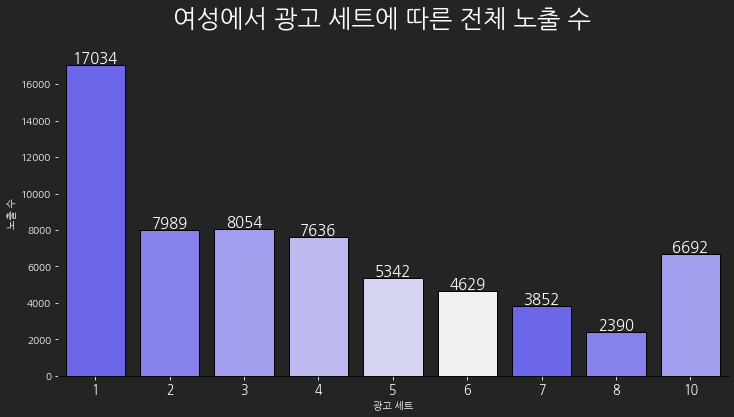

In [ ]:
# 여성층에서 1번 광고가 가장 노출이 많이 됨
plt.figure(figsize=(12,6))
x = sns.barplot(data = female_data, x='광고 세트', y='노출', palette = colors,
            estimator = sum, ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+150), ha = 'center', size =15, color = 'white')
plt.xlabel('광고 세트',color='white')
plt.ylabel('노출 수',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성에서 광고 세트에 따른 전체 노출 수', size = 25,color='white')
plt.show()

### 전체 결과 수

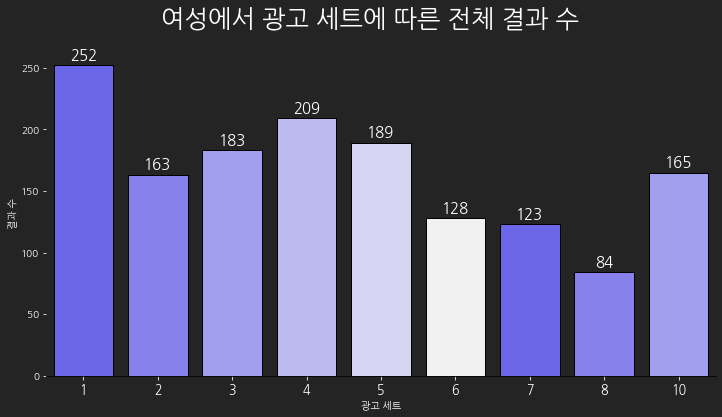

In [ ]:
# 결과 = 링크 클릭. 여성층에서 1번 광고의 결과 수가 가장 많긴 하지만 노출 수도 가장 많음.
# 오히려 노출 수에 비해 적은 편임.
plt.figure(figsize=(12,6))
x = sns.barplot(data = female_data, x='광고 세트', y='결과', palette = colors,
            estimator = sum, ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+5), ha = 'center', size =15, color = 'white')
plt.xlabel('광고 세트',color='white')
plt.ylabel('결과 수',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성에서 광고 세트에 따른 전체 결과 수', size = 25,color='white')
plt.show()

## 여성 - 광고 세트에 따른 광고 집행 결과 평가

In [ ]:
female_sex = female_data.groupby('광고 세트')['노출'].sum()

In [ ]:
female_df = female_data.groupby('광고 세트')[['CTR노출', 'CPM노출', 'CPC노출']].sum()

In [ ]:
adv_list = [1, 2, 3, 4, 5, 6, 7, 8, 10]

In [ ]:
female_ctr = []

for i in adv_list:
    female_ctr.append(female_df.loc[i, 'CTR노출'] / female_sex[i])
    
female_df['CTR'] = female_ctr

female_cpm = []

for i in adv_list:
    female_cpm.append(female_df.loc[i, 'CPM노출'] / female_sex[i])
    
female_df['CPM'] = female_cpm

female_cpc = []

for i in adv_list:
    female_cpc.append(female_df.loc[i, 'CPC노출'] / female_sex[i])
    
female_df['CPC'] = female_cpc

female_df['광고 세트'] = adv_list

### CPC

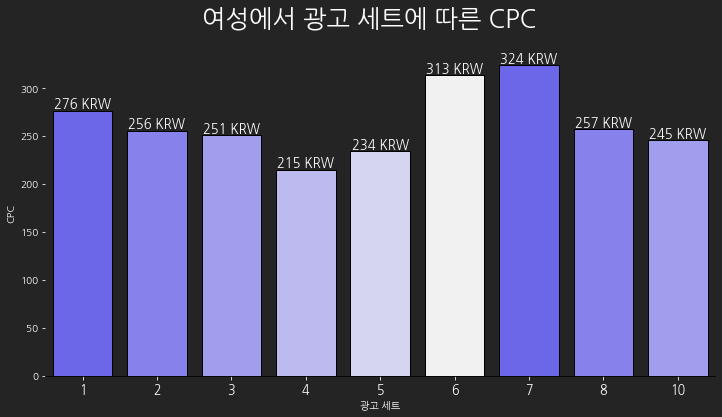

In [ ]:
# CPC(결과당 비용)를 가중평균으로 계산하여 그래프로 나타낸 것
# -> 링크 클릭에 투입되는 비용!! 낮을수록 좋음. 4번에서 가장 좋았다.
plt.figure(figsize=(12,6))
x = sns.barplot(data = female_df, x='광고 세트', y='CPC', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + ' KRW'}",(left+width/2, height+3), ha = 'center', size =13, color = 'white')
plt.xlabel('광고 세트',color='white')
plt.ylabel('CPC',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성에서 광고 세트에 따른 CPC', size = 25,color='white')
plt.show()

### CPM

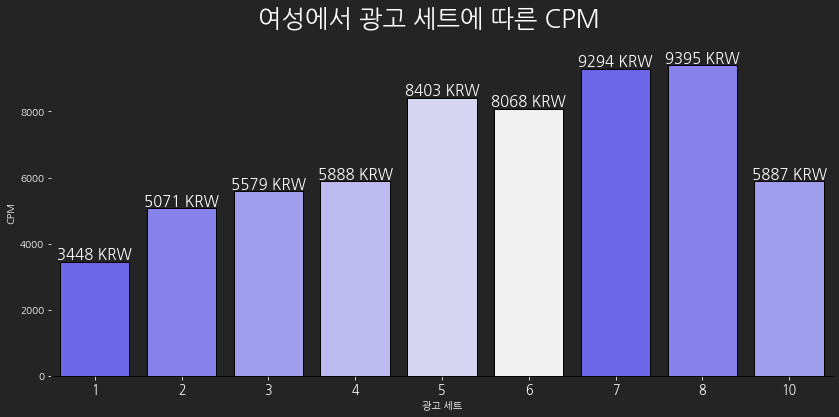

In [ ]:
# CPM(1,000회 노출당 비용)을 가중평균으로 계산하여 그래프로 나타낸 것
# -> 광고 노출에 투입되는 비용!! 적을수록 좋은 것 -> 1번이 가장 낮음. 효율이 가장 좋았다.
plt.figure(figsize=(14,6))
x = sns.barplot(data = female_df, x='광고 세트', y='CPM', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + ' KRW'}",(left+width/2, height+100), ha = 'center', size =15, color = 'white')
plt.xlabel('광고 세트',color='white')
plt.ylabel('CPM',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성에서 광고 세트에 따른 CPM', size = 25,color='white')
plt.show()

### CTR

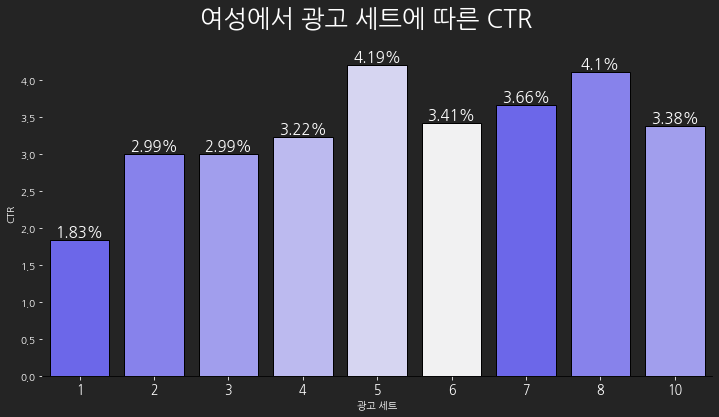

In [ ]:
# CTR(노출 대비 결과)을 가중평균으로 계산하여 그래프로 나타낸 것
# -> 현재의 광고 전략이 제대로 이루어지는가?!
# -> 5, 8번 광고가 가장 높음
# 5번 : 업무효율을 높이게 (직원 입장)
# 8번 : 엄마 갱년기로 잠 못자서 걱정되는 마음을 해결하게
# 위의 두 광고 카피가 여성에게서 좋은 반응을 얻었다.
# 한편, 1번 광고에 대해서는 반응이 좋지 않았음. 이에 대한 추가 분석 필요.
plt.figure(figsize=(12,6))
x = sns.barplot(data = female_df, x='광고 세트', y='CTR', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(round(height, 2)) + '%'}",(left+width/2, height+0.05), ha = 'center', size =15, color = 'white')
plt.xlabel('광고 세트',color='white')
plt.ylabel('CTR',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성에서 광고 세트에 따른 CTR', size = 25,color='white')
plt.show()

## 여성 - 광고 세트에 따른 광고 집행 결과 - 1번 세트 세부 분석

In [ ]:
female_1 = female_data[female_data['광고 세트']==1]

In [ ]:
age_list = ['13-17', '18-24', '25-34', '35-44', '45-54']

### 전체 노출 수

ValueError: cannot convert float NaN to integer

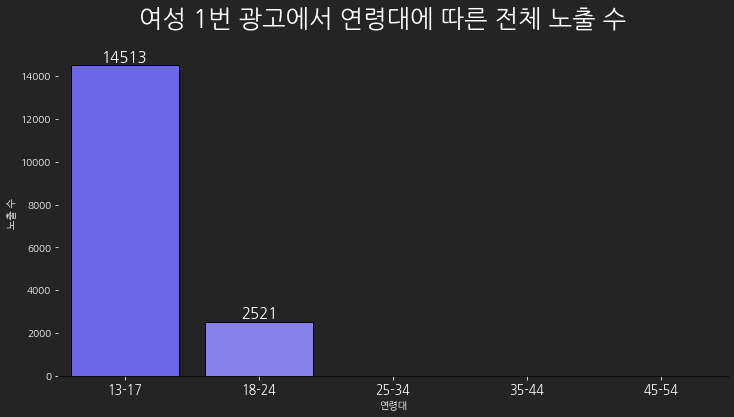

In [ ]:
# 13-17세, 18-24세에만 노출이 됨
plt.figure(figsize=(12,6))
x = sns.barplot(data = female_1, x='연령', y='노출', palette = colors,
            estimator = sum, ci = None, order = age_list,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('연령대',color='white')
plt.ylabel('노출 수',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성 1번 광고에서 연령대에 따른 전체 노출 수', size = 25,color='white')
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+200), ha = 'center', size =15, color = 'white')
plt.show()

### 전체 결과 수

ValueError: cannot convert float NaN to integer

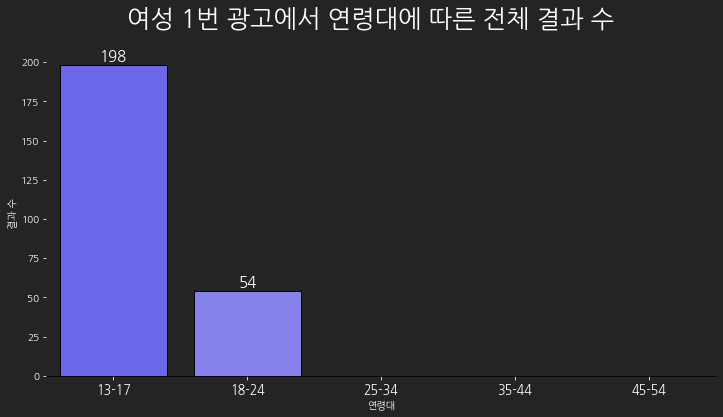

In [ ]:
# 결과 = 링크 클릭. 여성 1번 광고에서 13-17 연령대에 가장 많이 노출되었지만 이 연령대의 노출 수도 가장 많음.
plt.figure(figsize=(12,6))
x = sns.barplot(data = female_1, x='연령', y='결과', palette = colors,
            estimator = sum, ci = None, order = age_list,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('연령대',color='white')
plt.ylabel('결과 수',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성 1번 광고에서 연령대에 따른 전체 결과 수', size = 25,color='white')
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+3), ha = 'center', size =15, color = 'white')
plt.show()

## 여성 - 광고 세트에 따른 광고 집행 결과 평가 - 1번 세트 세부 분석

In [ ]:
female_111 = female_1.groupby('연령')['노출'].sum()

In [ ]:
female_111_df = female_1.groupby('연령')[['CTR노출', 'CPM노출', 'CPC노출']].sum()

In [ ]:
female_1_age = ['13-17', '18-24']

In [ ]:
female1_ctr = []

for i in female_1_age:
    female1_ctr.append(female_111_df.loc[i, 'CTR노출'] / female_111[i])
    
female_111_df['CTR'] = female1_ctr

female1_cpm = []

for i in female_1_age:
    female1_cpm.append(female_111_df.loc[i, 'CPM노출'] / female_111[i])
    
female_111_df['CPM'] = female1_cpm

female1_cpc = []

for i in female_1_age:
    female1_cpc.append(female_111_df.loc[i, 'CPC노출'] / female_111[i])
    
female_111_df['CPC'] = female1_cpc

female_111_df['연령'] = female_1_age

### CPC

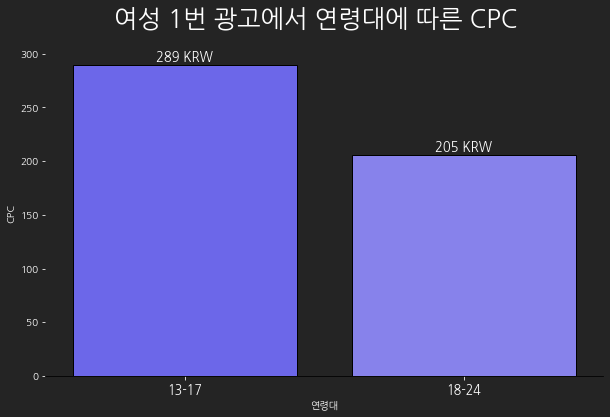

In [ ]:
# CPC(결과당 비용)를 가중평균으로 계산하여 그래프로 나타낸 것
# -> 링크 클릭에 투입되는 비용!! 낮을수록 좋음. 18-24 연령대에서 낮음. -> good!
plt.figure(figsize=(10,6))
x = sns.barplot(data = female_111_df, x='연령', y='CPC', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + ' KRW'}",(left+width/2, height+5), ha = 'center', size =13, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('CPC',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성 1번 광고에서 연령대에 따른 CPC', size = 25,color='white')
plt.show()

### CPM

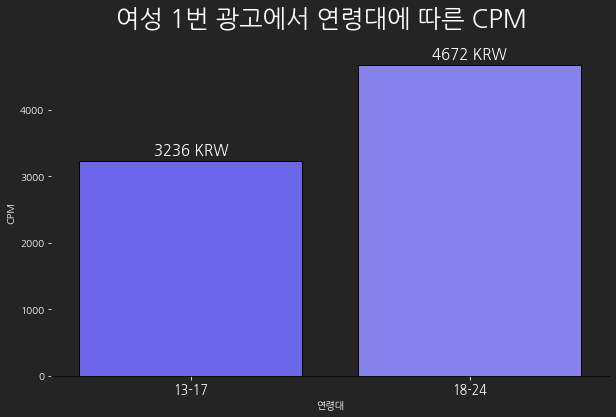

In [ ]:
# CPM(1,000회 노출당 비용)을 가중평균으로 계산하여 그래프로 나타낸 것
# -> 광고 노출에 투입되는 비용!! 적을수록 좋은 것 -> 13-17 연령대에서 더 낮음. 효율이 더 좋았다.
plt.figure(figsize=(10,6))
x = sns.barplot(data = female_111_df, x='연령', y='CPM', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + ' KRW'}",(left+width/2, height+100), ha = 'center', size =15, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('CPM',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성 1번 광고에서 연령대에 따른 CPM', size = 25,color='white')
plt.show()

### CTR

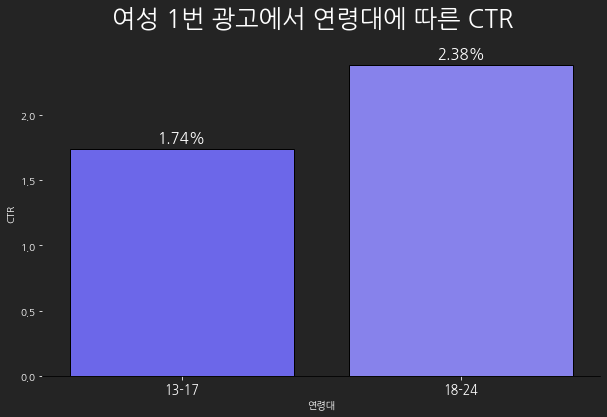

In [ ]:
# CTR(노출 대비 결과)을 가중평균으로 계산하여 그래프로 나타낸 것
# -> 현재의 광고 전략이 제대로 이루어지는가?!
# -> 18-24 연령대에서 높음
# 이 연령층에서 반응이 더 좋았다
plt.figure(figsize=(10,6))
x = sns.barplot(data = female_111_df, x='연령', y='CTR', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(round(height, 2)) + '%'}",(left+width/2, height+0.05), ha = 'center', size =15, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('CTR',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성 1번 광고에서 연령대에 따른 CTR', size = 25,color='white')
plt.show()

# 남성에서 광고 세트에 따른 분석

In [ ]:
male_data = mdata1[mdata1['성']=='male']

## 남성 - 광고 세트에 따른 광고 집행 결과

### 전체 노출 수

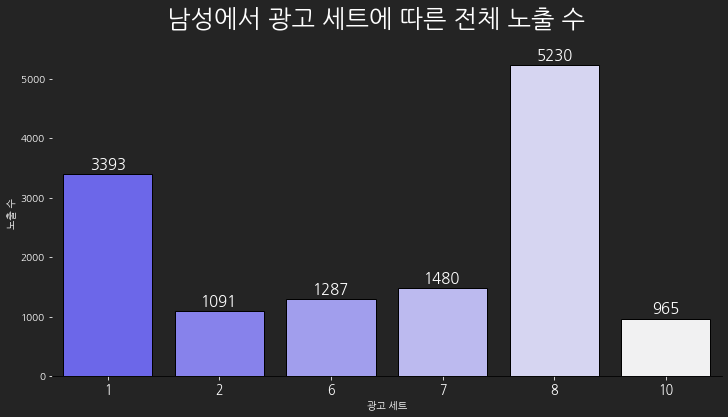

In [ ]:
# 남성층에서 8번 광고가 가장 노출이 많이 됨
# 여성과는 다르게 모든 광고 세트가 노출되지는 않음
plt.figure(figsize=(12,6))
x = sns.barplot(data = male_data, x='광고 세트', y='노출', palette = colors,
            estimator = sum, ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+100), ha = 'center', size =15, color = 'white')
plt.xlabel('광고 세트',color='white')
plt.ylabel('노출 수',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('남성에서 광고 세트에 따른 전체 노출 수', size = 25,color='white')
plt.show()

### 전체 결과 수

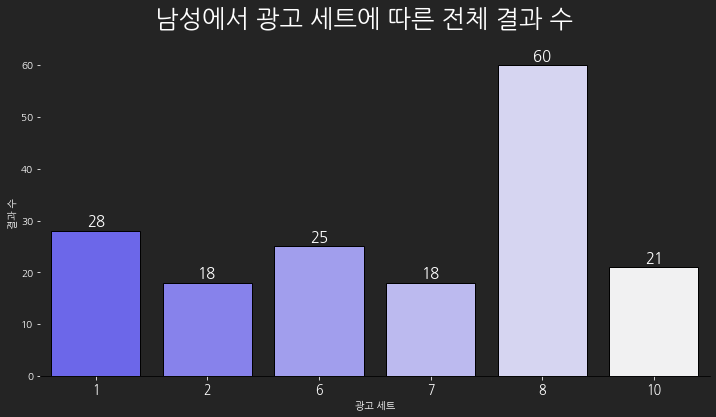

In [ ]:
# 결과 = 링크 클릭. 남성층에서 8번 광고의 결과 수가 가장 높지만 노출 수도 가장 많았음.
plt.figure(figsize=(12,6))
x = sns.barplot(data = male_data, x='광고 세트', y='결과', palette = colors,
            estimator = sum, ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =15, color = 'white')
plt.xlabel('광고 세트',color='white')
plt.ylabel('결과 수',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('남성에서 광고 세트에 따른 전체 결과 수', size = 25,color='white')
plt.show()

## 남성 - 광고 세트에 따른 광고 집행 결과 평가

In [ ]:
male_sex = male_data.groupby('광고 세트')['노출'].sum()

In [ ]:
male_df = male_data.groupby('광고 세트')[['CTR노출', 'CPM노출', 'CPC노출']].sum()

In [ ]:
adv_list_male = [1, 2, 6, 7, 8, 10]

In [ ]:
male_ctr = []

for i in adv_list_male:
    male_ctr.append(male_df.loc[i, 'CTR노출'] / male_sex[i])
    
male_df['CTR'] = male_ctr

male_cpm = []

for i in adv_list_male:
    male_cpm.append(male_df.loc[i, 'CPM노출'] / male_sex[i])
    
male_df['CPM'] = male_cpm

male_cpc = []

for i in adv_list_male:
    male_cpc.append(male_df.loc[i, 'CPC노출'] / male_sex[i])
    
male_df['CPC'] = male_cpc

male_df['광고 세트'] = adv_list_male

### CPC

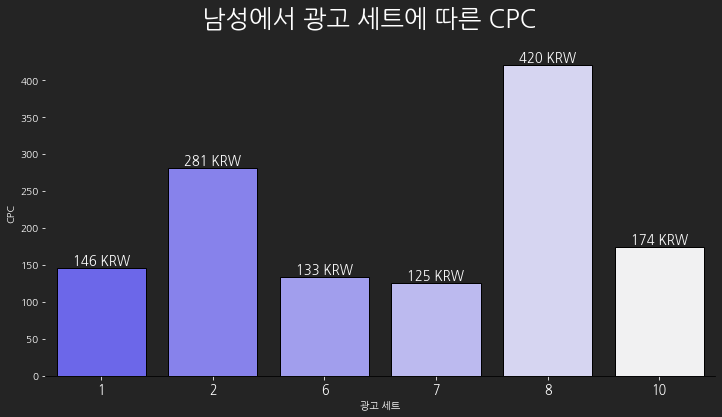

In [ ]:
# CPC(결과당 비용)를 가중평균으로 계산하여 그래프로 나타낸 것
# -> 링크 클릭에 투입되는 비용!! 낮을수록 좋음. 2, 8번 제외하고는 비슷함. 8번에서 효율 별로
plt.figure(figsize=(12,6))
x = sns.barplot(data = male_df, x='광고 세트', y='CPC', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + ' KRW'}",(left+width/2, height+5), ha = 'center', size =13, color = 'white')
plt.xlabel('광고 세트',color='white')
plt.ylabel('CPC',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('남성에서 광고 세트에 따른 CPC', size = 25,color='white')
plt.show()

### CPM

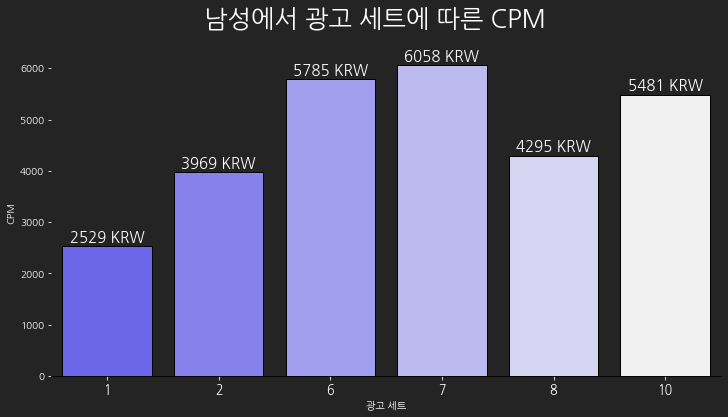

In [ ]:
# CPM(1,000회 노출당 비용)을 가중평균으로 계산하여 그래프로 나타낸 것
# -> 광고 노출에 투입되는 비용!! 적을수록 좋은 것 -> 1번이 가장 낮음. 효율이 가장 좋았다.
plt.figure(figsize=(12,6))
x = sns.barplot(data = male_df, x='광고 세트', y='CPM', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + ' KRW'}",(left+width/2, height+100), ha = 'center', size =15, color = 'white')
plt.xlabel('광고 세트',color='white')
plt.ylabel('CPM',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('남성에서 광고 세트에 따른 CPM', size = 25,color='white')
plt.show()

### CTR

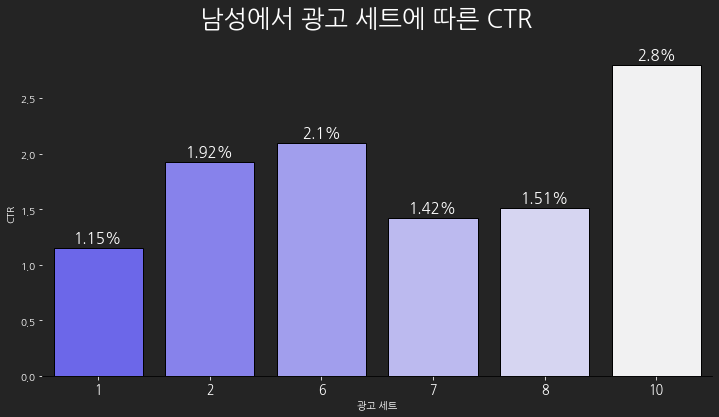

In [ ]:
# CTR(노출 대비 결과)을 가중평균으로 계산하여 그래프로 나타낸 것
# -> 현재의 광고 전략이 제대로 이루어지는가?!
# -> 10번 광고가 가장 높음
# 10번 : 불안감을 해결하게
# 위의 광고 카피가 남성에게서 좋은 반응을 얻었다.
plt.figure(figsize=(12,6))
x = sns.barplot(data = male_df, x='광고 세트', y='CTR', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(round(height, 2)) + '%'}",(left+width/2, height+0.05), ha = 'center', size =15, color = 'white')
plt.xlabel('광고 세트',color='white')
plt.ylabel('CTR',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('남성에서 광고 세트에 따른 CTR', size = 25,color='white')
plt.show()

# 여성에서 연령대에 따른 분석

## 여성 - 연령대에 따른 광고 집행 결과

### 전체 노출 수

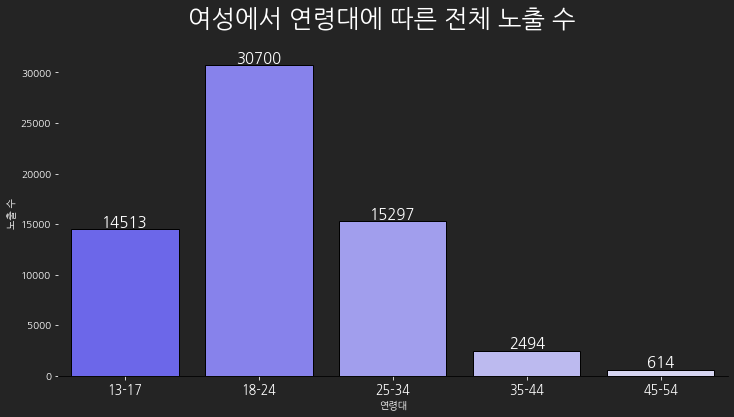

In [ ]:
# 여성층에서 18-24 연령대에 가장 많이 노출됨
plt.figure(figsize=(12,6))
x = sns.barplot(data = female_data, x='연령', y='노출', palette = colors,
            estimator = sum, ci = None, order = age_list,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+300), ha = 'center', size =15, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('노출 수',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성에서 연령대에 따른 전체 노출 수', size = 25,color='white')
plt.show()

### 전체 결과 수

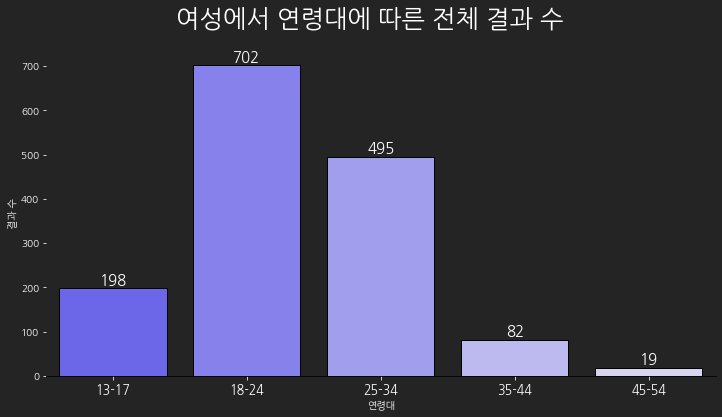

In [ ]:
# 결과 = 링크 클릭. 여성층에서 18-24 연령대에 가장 많이 노출되었지만 이 연령대의 노출 수도 가장 많음.
plt.figure(figsize=(12,6))
x = sns.barplot(data = female_data, x='연령', y='결과', palette = colors,
            estimator = sum, ci = None, order = age_list,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+10), ha = 'center', size =15, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('결과 수',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성에서 연령대에 따른 전체 결과 수', size = 25,color='white')
plt.show()

## 여성 - 연령대에 따른 광고 집행 결과 평가

In [ ]:
female_age = female_data.groupby('연령')['노출'].sum()

In [ ]:
female_age_df = female_data.groupby('연령')[['CTR노출', 'CPM노출', 'CPC노출']].sum()

In [ ]:
fage_ctr = []

for i in age_list:
    fage_ctr.append(female_age_df.loc[i, 'CTR노출'] / female_age[i])
    
female_age_df['CTR'] = fage_ctr

fage_cpm = []

for i in age_list:
    fage_cpm.append(female_age_df.loc[i, 'CPM노출'] / female_age[i])
    
female_age_df['CPM'] = fage_cpm

fage_cpc = []

for i in age_list:
    fage_cpc.append(female_age_df.loc[i, 'CPC노출'] / female_age[i])
    
female_age_df['CPC'] = fage_cpc

female_age_df['연령'] = age_list

### CPC

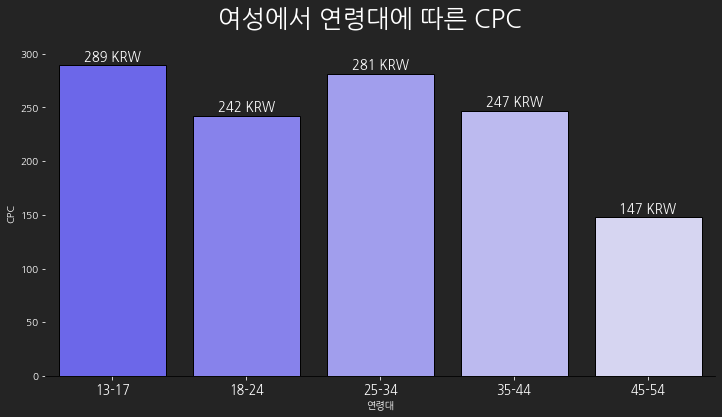

In [ ]:
# CPC(결과당 비용)를 가중평균으로 계산하여 그래프로 나타낸 것
# -> 링크 클릭에 투입되는 비용!! 낮을수록 좋음. 45-54 연령대에서 낮음. -> good!
plt.figure(figsize=(12,6))
x = sns.barplot(data = female_age_df, x='연령', y='CPC', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + ' KRW'}",(left+width/2, height+5), ha = 'center', size =13, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('CPC',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성에서 연령대에 따른 CPC', size = 25,color='white')
plt.show()

### CPM

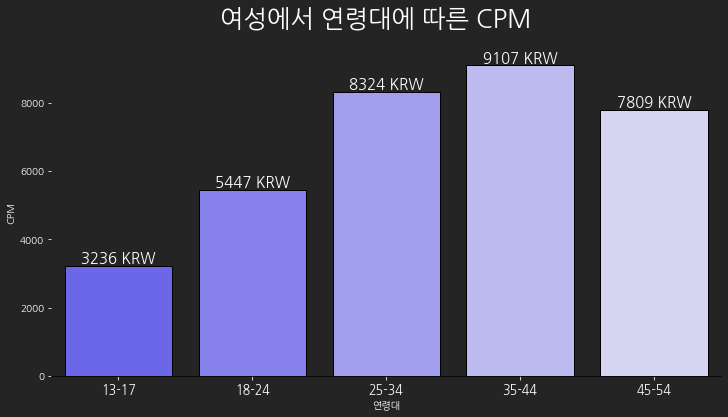

In [ ]:
# CPM(1,000회 노출당 비용)을 가중평균으로 계산하여 그래프로 나타낸 것
# -> 광고 노출에 투입되는 비용!! 적을수록 좋은 것 -> 13-17 연령대에서 가장 낮음. 효율이 가장 좋았다.
plt.figure(figsize=(12,6))
x = sns.barplot(data = female_age_df, x='연령', y='CPM', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + ' KRW'}",(left+width/2, height+100), ha = 'center', size =15, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('CPM',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성에서 연령대에 따른 CPM', size = 25,color='white')
plt.show()

### CTR

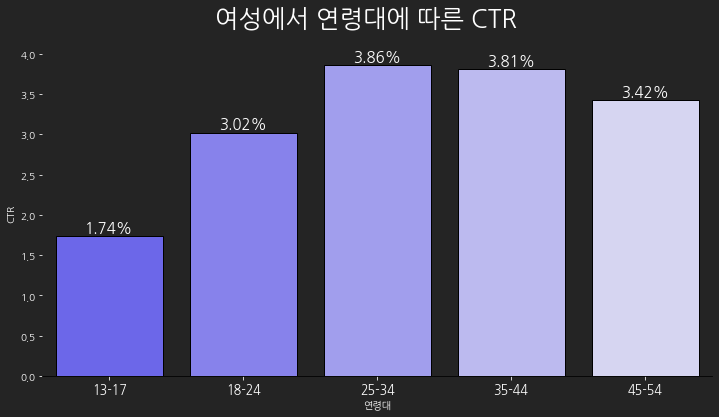

In [ ]:
# CTR(노출 대비 결과)을 가중평균으로 계산하여 그래프로 나타낸 것
# -> 현재의 광고 전략이 제대로 이루어지는가?!
# -> 25-34, 35-44 연령대에서 가장 높음
# 이 연령층에서 반응이 좋았다
plt.figure(figsize=(12,6))
x = sns.barplot(data = female_age_df, x='연령', y='CTR', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(round(height, 2)) + '%'}",(left+width/2, height+0.05), ha = 'center', size =15, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('CTR',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('여성에서 연령대에 따른 CTR', size = 25,color='white')
plt.show()

## 남성 - 연령대에 따른 광고 집행 결과

### 전체 노출 수

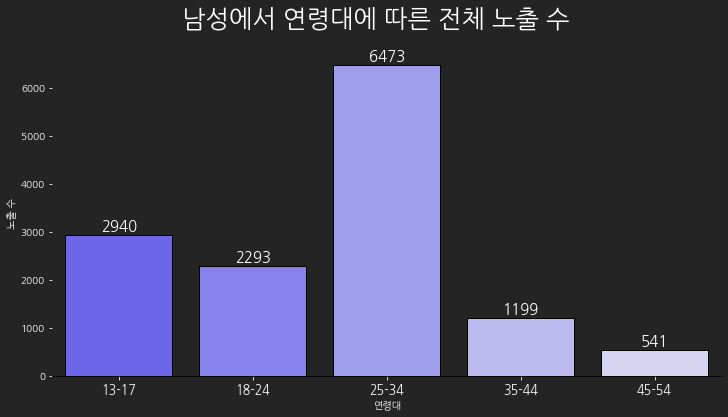

In [ ]:
# 남성층에서 25-34 연령대에 가장 많이 노출됨
plt.figure(figsize=(12,6))
x = sns.barplot(data = male_data, x='연령', y='노출', palette = colors,
            estimator = sum, ci = None, order = age_list,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+100), ha = 'center', size =15, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('노출 수',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('남성에서 연령대에 따른 전체 노출 수', size = 25,color='white')
plt.show()

### 전체 결과 수

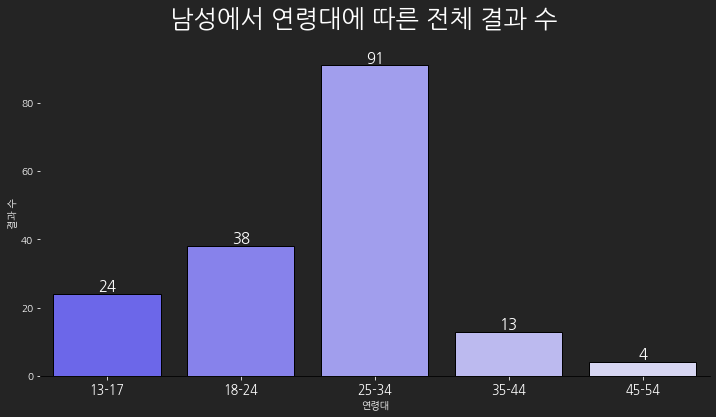

In [ ]:
# 결과 = 링크 클릭. 남성층에서 25-34 연령대에 가장 많이 노출되었지만 이 연령대의 노출 수도 가장 많음.
plt.figure(figsize=(12,6))
x = sns.barplot(data = male_data, x='연령', y='결과', palette = colors,
            estimator = sum, ci = None, order = age_list,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =15, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('결과 수',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('남성에서 연령대에 따른 전체 결과 수', size = 25,color='white')
plt.show()

## 남성 - 연령대에 따른 광고 집행 결과 평가

In [ ]:
male_age = male_data.groupby('연령')['노출'].sum()

In [ ]:
male_age_df = male_data.groupby('연령')[['CTR노출', 'CPM노출', 'CPC노출']].sum()

In [ ]:
mage_ctr = []

for i in age_list:
    mage_ctr.append(male_age_df.loc[i, 'CTR노출'] / male_age[i])
    
male_age_df['CTR'] = mage_ctr

mage_cpm = []

for i in age_list:
    mage_cpm.append(male_age_df.loc[i, 'CPM노출'] / male_age[i])
    
male_age_df['CPM'] = mage_cpm

mage_cpc = []

for i in age_list:
    mage_cpc.append(male_age_df.loc[i, 'CPC노출'] / male_age[i])
    
male_age_df['CPC'] = mage_cpc

male_age_df['연령'] = age_list

### CPC

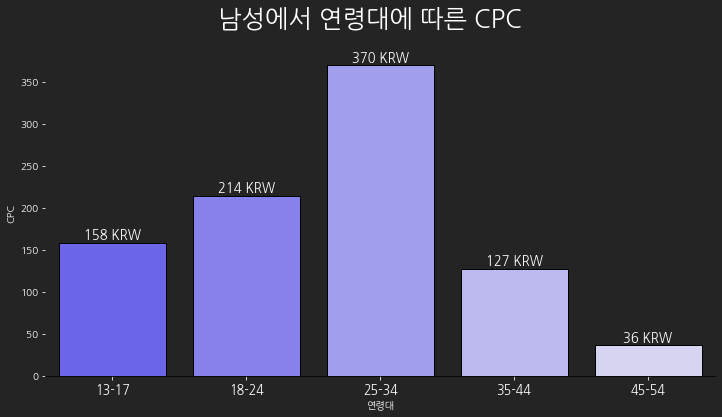

In [ ]:
# CPC(결과당 비용)를 가중평균으로 계산하여 그래프로 나타낸 것
# -> 링크 클릭에 투입되는 비용!! 낮을수록 좋음. 45-54 연령대에서 낮음. -> good!
plt.figure(figsize=(12,6))
x = sns.barplot(data = male_age_df, x='연령', y='CPC', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + ' KRW'}",(left+width/2, height+5), ha = 'center', size =13, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('CPC',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('남성에서 연령대에 따른 CPC', size = 25,color='white')
plt.show()

### CPM

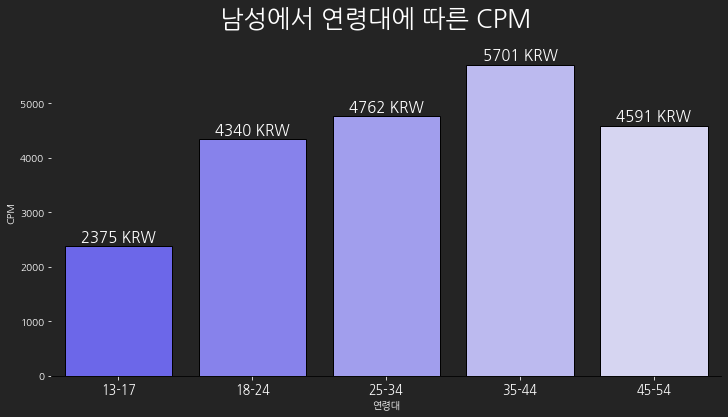

In [ ]:
# CPM(1,000회 노출당 비용)을 가중평균으로 계산하여 그래프로 나타낸 것
# -> 광고 노출에 투입되는 비용!! 적을수록 좋은 것 -> 13-17 연령대에서 가장 낮음. 효율이 가장 좋았다.
plt.figure(figsize=(12,6))
x = sns.barplot(data = male_age_df, x='연령', y='CPM', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + ' KRW'}",(left+width/2, height+100), ha = 'center', size =15, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('CPM',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('남성에서 연령대에 따른 CPM', size = 25,color='white')
plt.show()

### CTR

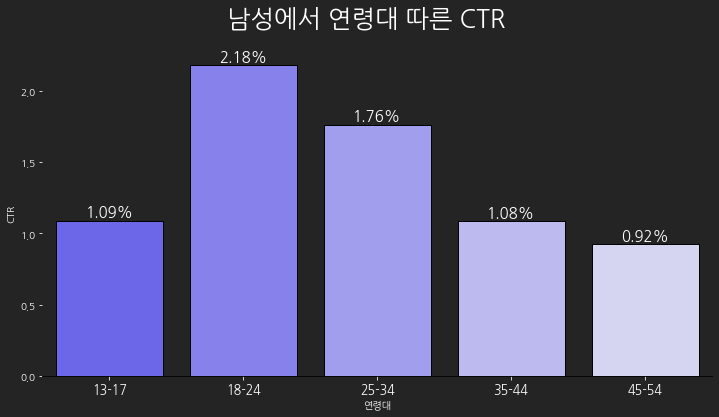

In [ ]:
# CTR(노출 대비 결과)을 가중평균으로 계산하여 그래프로 나타낸 것
# -> 현재의 광고 전략이 제대로 이루어지는가?!
# -> 18-24 연령대에서 가장 높음
# 이 연령층에서 반응이 좋았다
plt.figure(figsize=(12,6))
x = sns.barplot(data = male_age_df, x='연령', y='CTR', palette = colors,
            ci = None,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(round(height, 2)) + '%'}",(left+width/2, height+0.03), ha = 'center', size =15, color = 'white')
plt.xlabel('연령대',color='white')
plt.ylabel('CTR',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('남성에서 연령대 따른 CTR', size = 25,color='white')
plt.show()